In [1]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
happy_results = pd.read_csv('Resources/Data_2022.csv')

In [3]:
happy_results.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [4]:
#Clean the datafram and eliminate all years prior to 2019
clean_file_df = happy_results.loc[(happy_results["year"] >= 2019), :].dropna()
print(clean_file_df.head())

   Country name  year  Life Ladder  Log GDP per capita  Social support  \
11  Afghanistan  2019        2.375               7.640           0.420   
12  Afghanistan  2021        2.436               7.324           0.454   
25      Albania  2019        4.995               9.522           0.686   
26      Albania  2020        5.365               9.492           0.710   
27      Albania  2021        5.255               9.583           0.702   

    Healthy life expectancy at birth  Freedom to make life choices  \
11                            53.900                         0.394   
12                            54.550                         0.394   
25                            69.100                         0.777   
26                            69.125                         0.754   
27                            69.150                         0.827   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
11      -0.106                      0.924            0.3

In [5]:
print(clean_file_df.shape[0])

452


In [6]:
#Clean dataframe and drop unnecessary columns
new_df = clean_file_df.drop(columns=['Log GDP per capita', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect'])
print(new_df.head())

   Country name  year  Life Ladder  Social support  \
11  Afghanistan  2019        2.375           0.420   
12  Afghanistan  2021        2.436           0.454   
25      Albania  2019        4.995           0.686   
26      Albania  2020        5.365           0.710   
27      Albania  2021        5.255           0.702   

    Healthy life expectancy at birth  Perceptions of corruption  
11                            53.900                      0.924  
12                            54.550                      0.946  
25                            69.100                      0.914  
26                            69.125                      0.891  
27                            69.150                      0.896  


In [7]:
new_df.reset_index(drop=True)

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Perceptions of corruption
0,Afghanistan,2019,2.375,0.420,53.900,0.924
1,Afghanistan,2021,2.436,0.454,54.550,0.946
2,Albania,2019,4.995,0.686,69.100,0.914
3,Albania,2020,5.365,0.710,69.125,0.891
4,Albania,2021,5.255,0.702,69.150,0.896
...,...,...,...,...,...,...
447,Zambia,2021,3.082,0.619,55.250,0.824
448,Zimbabwe,2019,2.694,0.759,53.100,0.831
449,Zimbabwe,2020,3.160,0.717,53.575,0.789
450,Zimbabwe,2021,3.155,0.685,54.050,0.757


In [8]:
#Sort test 1 - part 1
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=(True, True))
print(sorted_df.head())

     Country name  year  Life Ladder  Social support  \
11    Afghanistan  2019        2.375           0.420   
2195     Zimbabwe  2019        2.694           0.759   
844         India  2019        3.249           0.561   
1647       Rwanda  2019        3.268           0.489   
2179       Zambia  2019        3.307           0.638   

      Healthy life expectancy at birth  Perceptions of corruption  
11                                53.9                      0.924  
2195                              53.1                      0.831  
844                               60.3                      0.752  
1647                              60.2                      0.168  
2179                              54.4                      0.832  


In [9]:
#Sort test 1 - part 2
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=(True, False))
print(sorted_df.head())

     Country name  year  Life Ladder  Social support  \
634       Finland  2019        7.780           0.937   
1874  Switzerland  2019        7.694           0.949   
518       Denmark  2019        7.693           0.958   
1481       Norway  2019        7.442           0.942   
1392  Netherlands  2019        7.425           0.941   

      Healthy life expectancy at birth  Perceptions of corruption  
634                               71.0                      0.195  
1874                              72.5                      0.294  
518                               71.0                      0.174  
1481                              71.4                      0.271  
1392                              71.4                      0.360  


In [10]:
#Sort test 2 - part 1
sorted_df = new_df.sort_values(['year', 'Life Ladder'])
print(sorted_df.head())


     Country name  year  Life Ladder  Social support  \
11    Afghanistan  2019        2.375           0.420   
2195     Zimbabwe  2019        2.694           0.759   
844         India  2019        3.249           0.561   
1647       Rwanda  2019        3.268           0.489   
2179       Zambia  2019        3.307           0.638   

      Healthy life expectancy at birth  Perceptions of corruption  
11                                53.9                      0.924  
2195                              53.1                      0.831  
844                               60.3                      0.752  
1647                              60.2                      0.168  
2179                              54.4                      0.832  


In [11]:
#Sort test 2 - part 2
sorted_df = new_df.sort_values(['year', 'Life Ladder'], ascending=False)
print(sorted_df.head())


     Country name  year  Life Ladder  Social support  \
637       Finland  2022        7.729           0.974   
925        Israel  2022        7.662           0.954   
521       Denmark  2022        7.545           0.970   
830       Iceland  2022        7.449           0.985   
1865       Sweden  2022        7.431           0.949   

      Healthy life expectancy at birth  Perceptions of corruption  
637                             71.225                      0.190  
925                             72.850                      0.655  
521                             71.375                      0.203  
830                             72.075                      0.692  
1865                            72.275                      0.213  


In [12]:
#Sort test 3 - part 1
sorted_df = new_df.sort_values('year')

#Get the 5 countries with the highest Life Ladder scores in the selected rows.
highest_life_ladder = sorted_df.nlargest(10, 'Life Ladder')
print('Countries with the highest Ladder Scores:')
print(highest_life_ladder[['Country name', 'year', 'Life Ladder',]])

Countries with the highest Ladder Scores:
     Country name  year  Life Ladder
635       Finland  2020        7.889
636       Finland  2021        7.794
634       Finland  2019        7.780
637       Finland  2022        7.729
520       Denmark  2021        7.699
1874  Switzerland  2019        7.694
518       Denmark  2019        7.693
925        Israel  2022        7.662
924        Israel  2021        7.578
828       Iceland  2020        7.575


In [13]:
#Sort test 3 - part 2
#Get the 5 countries with the highest Life Ladder scores in the selected
lowest_life_ladder = sorted_df.nsmallest(10, 'Life Ladder')
print('Countries with the lowest Ladder Scores:')
print(lowest_life_ladder[['Country name', 'year', 'Life Ladder']])

Countries with the lowest Ladder Scores:
      Country name  year  Life Ladder
1116       Lebanon  2021        2.179
1117       Lebanon  2022        2.352
11     Afghanistan  2019        2.375
12     Afghanistan  2021        2.436
1709  Sierra Leone  2022        2.560
1115       Lebanon  2020        2.634
2195      Zimbabwe  2019        2.694
2181        Zambia  2021        3.082
2197      Zimbabwe  2021        3.155
2196      Zimbabwe  2020        3.160


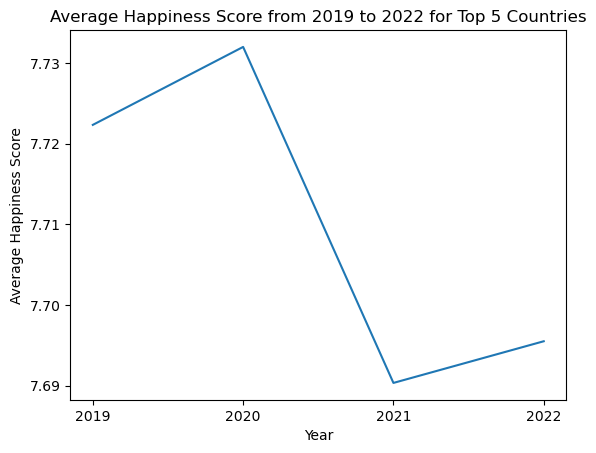

In [14]:
#Convert the 'year' column to a string
highest_life_ladder['year'] = highest_life_ladder['year'].astype(str)
    
# Calculate the average Happiness Score for each year
yearly_means = highest_life_ladder.groupby('year')['Life Ladder'].mean()

# Create a line plot of the yearly means
plt.plot(yearly_means.index, yearly_means.values)
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score from 2019 to 2022 for Top 5 Countries')
plt.show()


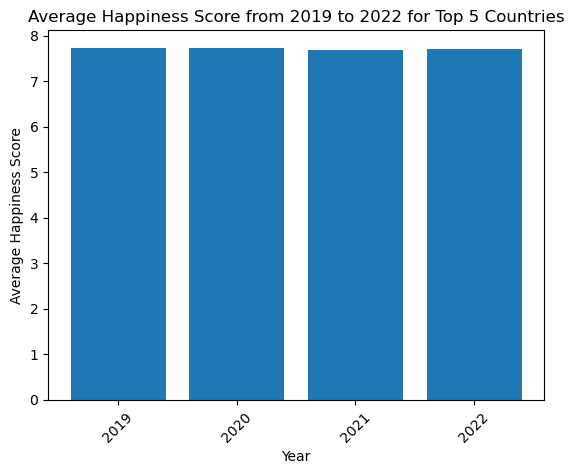

In [15]:
#Convert the 'year' column to a string
highest_life_ladder['year'] = highest_life_ladder['year'].astype(str)
    
# Calculate the average Happiness Score for each year
yearly_means = highest_life_ladder.groupby('year')['Life Ladder'].mean()

# Create a bar chart of the yearly means
plt.bar(yearly_means.index, yearly_means.values)
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score from 2019 to 2022 for Top 5 Countries')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()


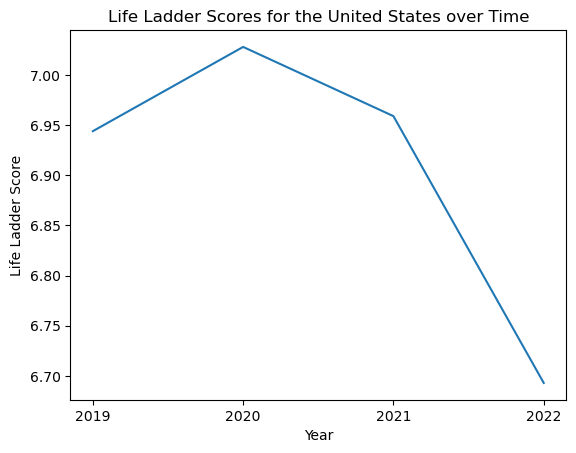

In [16]:
 #Line plot showing Happiness scores for US only over 4 year timeframe.
# Convert the 'year' column to a string
sorted_df['year'] = sorted_df['year'].astype(str)

# Filter the dataframe to only include data for the United States
us_data = sorted_df[sorted_df['Country name'] == 'United States']

# Create a line plot of happiness scores over time for the United States
plt.plot(us_data['year'], us_data['Life Ladder'])

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Life Ladder Score')
plt.title('Life Ladder Scores for the United States over Time')

# Display the plot
plt.show()


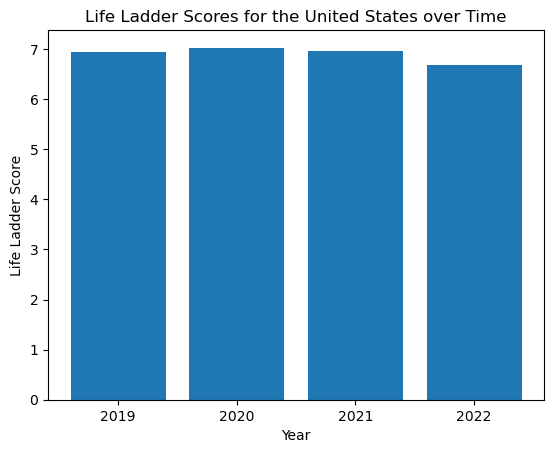

In [17]:
#Bar chart showing Happiness scores for US only over 4 year timeframe.
# Convert the 'year' column to a string
sorted_df['year'] = sorted_df['year'].astype(str)

# Filter the dataframe to only include data for the United States
us_data = sorted_df[sorted_df['Country name'] == 'United States']

# Create a bar chart of happiness scores over time for the United States
plt.bar(us_data['year'], us_data['Life Ladder'])

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Life Ladder Score')
plt.title('Life Ladder Scores for the United States over Time')

# Display the plot
plt.show()


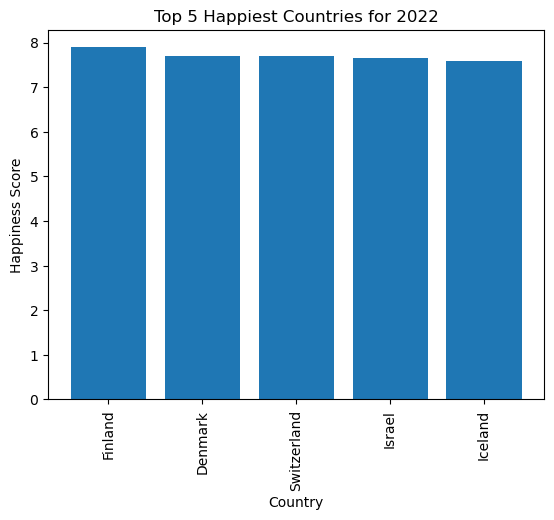

In [18]:
#Bar chart of top 5 happiest countries
# select data for most recent year
figure1 = highest_life_ladder.loc[highest_life_ladder['year'] == 2022]

# sort data by happiness score
figure1 = highest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure1 = highest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(highest_life_ladder['Country name'], highest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries for 2022')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

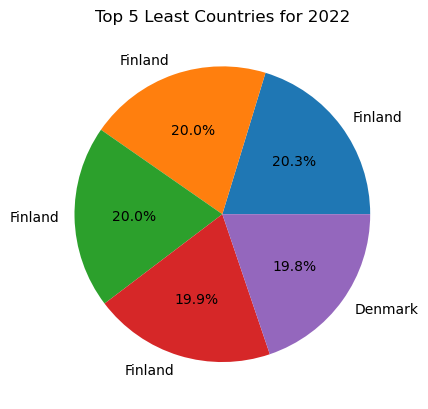

In [19]:
# create a pie chart of the 5 least happiest countries
plt.pie(figure1['Life Ladder'], labels=figure1['Country name'], autopct='%1.1f%%')

# add a title
plt.title('Top 5 Least Countries for 2022')

# display the plot
plt.show()


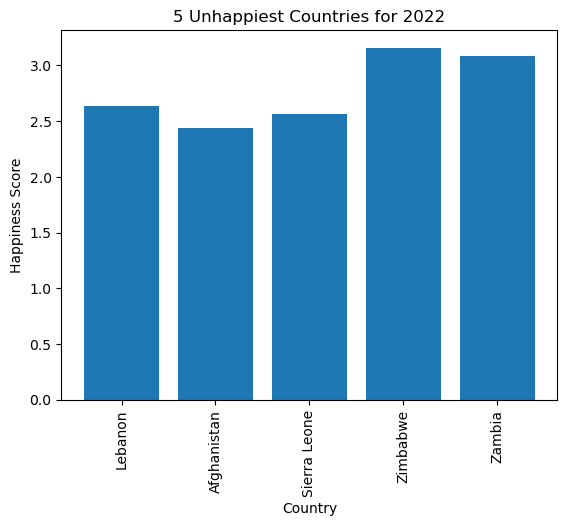

In [20]:
#Bar chart of top 5 Unhappiest countries
# select data for most recent year
figure2 = lowest_life_ladder.loc[lowest_life_ladder['year'] == 2022]

# sort data by happiness score
figure2 = lowest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure2 = lowest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(lowest_life_ladder['Country name'], lowest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('5 Unhappiest Countries for 2022')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

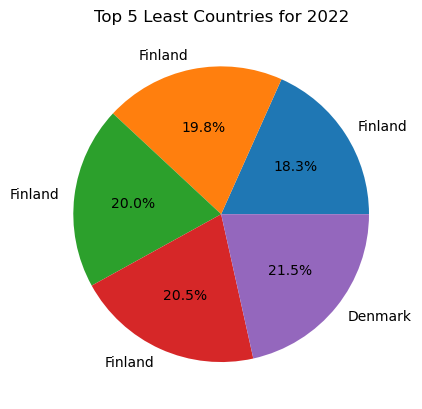

In [21]:
# create a pie chart of the top 5 least countries
plt.pie(figure2['Life Ladder'], labels=figure1['Country name'], autopct='%1.1f%%')

# add a title
plt.title('Top 5 Least Countries for 2022')

# display the plot
plt.show()

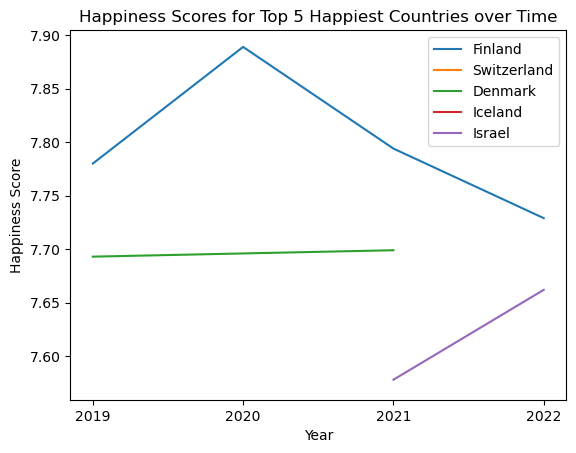

In [22]:
#Line Plot for Unhappiest countries sorted by year
# select data for top 5 unhappiest countries
figure2 = highest_life_ladder.loc[highest_life_ladder['Country name'].isin(highest_life_ladder['Country name'].unique()[:5])]

# sort data by year
figure2 = figure2.sort_values(by=['year'])

# create a line plot of happiness scores over time for top 5 unhappiest countries
for country in figure2['Country name'].unique():
    data = figure2.loc[figure2['Country name'] == country]
    plt.plot(data['year'], data['Life Ladder'], label=country)

# add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Scores for Top 5 Happiest Countries over Time')

# add a legend
plt.legend()

# display the plot
plt.show()


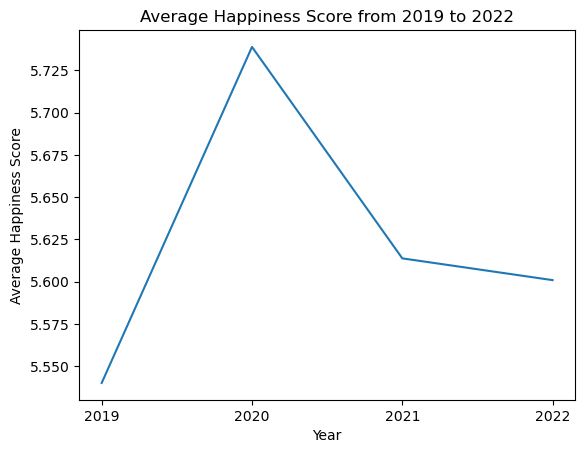

In [23]:
#Convert the 'year' column to a string
sorted_df['year'] = sorted_df['year'].astype(str)

# Calculate the average Happiness Score for each year
yearly_means = sorted_df.groupby('year')['Life Ladder'].mean()

# Create a line plot of the yearly means
plt.plot(yearly_means.index, yearly_means.values)
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score from 2019 to 2022')
plt.show()




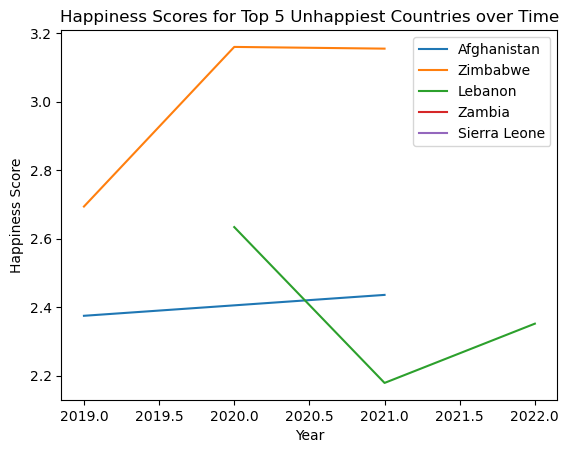

In [24]:
#Line Plot for Unhappiest countries sorted by year
# select data for top 5 unhappiest countries
figure2 = lowest_life_ladder.loc[lowest_life_ladder['Country name'].isin(lowest_life_ladder['Country name'].unique()[:5])]

# sort data by year
figure2 = figure2.sort_values(by=['year'])

# create a line plot of happiness scores over time for top 5 unhappiest countries
for country in figure2['Country name'].unique():
    data = figure2.loc[figure2['Country name'] == country]
    plt.plot(data['year'], data['Life Ladder'], label=country)

# add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Scores for Top 5 Unhappiest Countries over Time')

# add a legend
plt.legend()

# display the plot
plt.show()


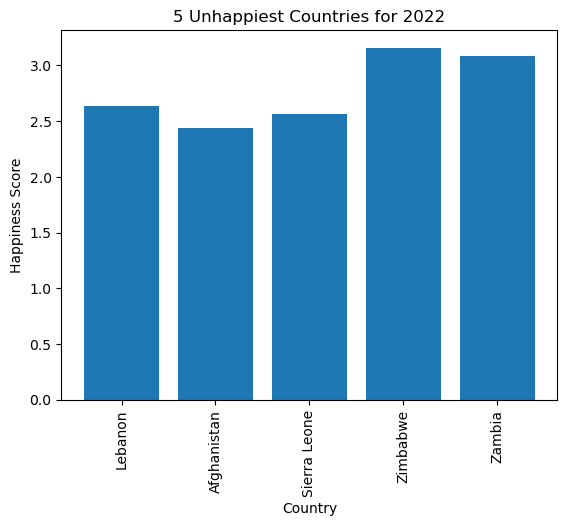

In [25]:
#Bar chart of top 5 happiest countries
# select data for most recent year
figure3 = lowest_life_ladder.loc[lowest_life_ladder['year'] == 2022]

# sort data by happiness score
figure1 = lowest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure1 = lowest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(lowest_life_ladder['Country name'], lowest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('5 Unhappiest Countries for 2022')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

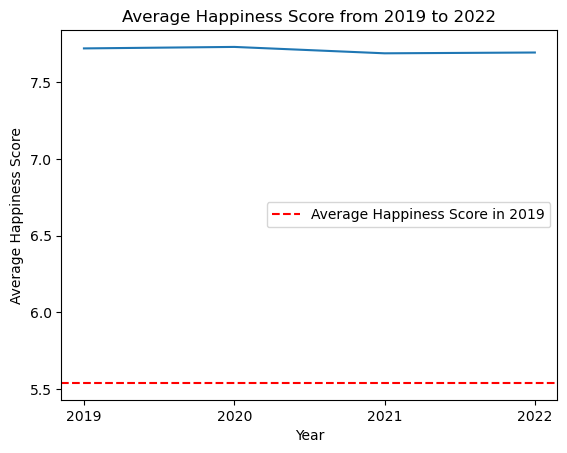

In [26]:

#THIS IS NO LONGER WORKING PROPERLY!  When ran on Thursday it matched Scott's.
#Now it doesn't match!


#Convert the 'year' column to a string
highest_life_ladder['year'] = highest_life_ladder['year'].astype(str)

# Calculate the average Happiness Score for each year
yearly_means = highest_life_ladder.groupby('year')['Life Ladder'].mean()

# Create a line plot of the yearly means
plt.plot(yearly_means.index, yearly_means.values)
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score from 2019 to 2022')

# Add a horizontal line at the average happiness score for 2019
avg_2019 = sorted_df.loc[sorted_df['year'] == '2019', 'Life Ladder'].mean()
plt.axhline(y=avg_2019, color='r', linestyle='--', label='Average Happiness Score in 2019')

# Add a legend
plt.legend()

# Show the plot
plt.show()

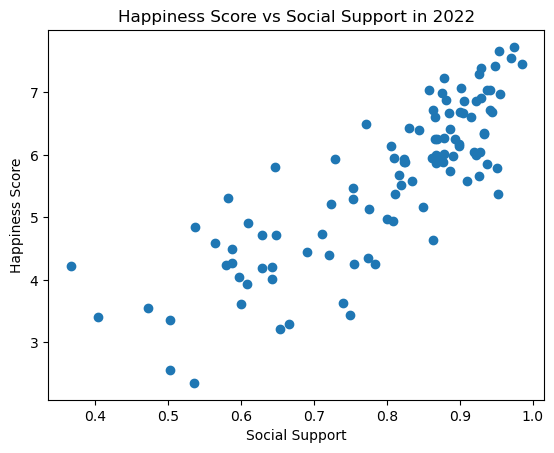

In [27]:
#NOTE:  THIS IS THE SAME SCATTER PLOT THAT SCOTT RAN.  HOWEVER, MY CODE IS DIFFERENT TO GET IT TO WORK WITH THE CODE ABOVE IN MY FILE.

# select data for year 2022
year_2022 = clean_file_df[clean_file_df['year'] == 2022]

# create a scatter plot of happiness score vs social support
plt.scatter(year_2022['Social support'], year_2022['Life Ladder'])

# add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Social Support in 2022')

# display the plot
plt.show()


Text(0.45, 6.5, 'R squared = 0.64')

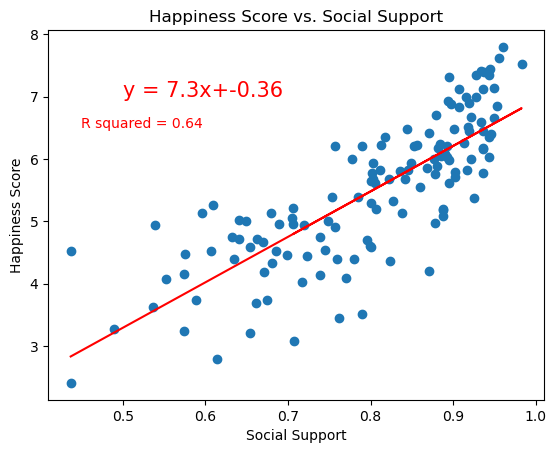

In [28]:
#NOTE: HAD TO CHANGE FIRST LINE OF CODE FROM SCOTT'S. I REC'D A WARNING
#MESSAGE SO HAD TO SET THE NUMBERIC_ONLY VALUE TO TRUE!  Doing so is changing it to 
#calculate the mean of the numeric columns.

# Scatter plot of happiness score vs. Social Support
figure5 = sorted_df.groupby('Country name').mean(numeric_only=True)

# Create a scatter plot of happiness score vs. Social Support
plt.scatter(figure5['Social support'], figure5['Life Ladder'])

# Add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Social Support')

# Perform linear regression
(social_slope, social_intercept, social_rvalue, social_pvalue, social_std_err) = st.linregress(figure5['Social support'], figure5['Life Ladder'])
regress_values = figure5['Social support'] * social_slope + social_intercept
line_eq = "y = " + str(round(social_slope,2)) + "x+" + str(round(social_intercept,2))

# Find r^2
social_r_sq = social_rvalue**2
soc_r_annotate = "R squared = " + str(round(social_r_sq,2))

# Plot regression line
plt.plot(figure5['Social support'], regress_values, "r-")
plt.annotate(line_eq, (0.5, 7), fontsize=15, color="red")
plt.annotate(soc_r_annotate, (0.45, 6.5), fontsize=10, color="red")

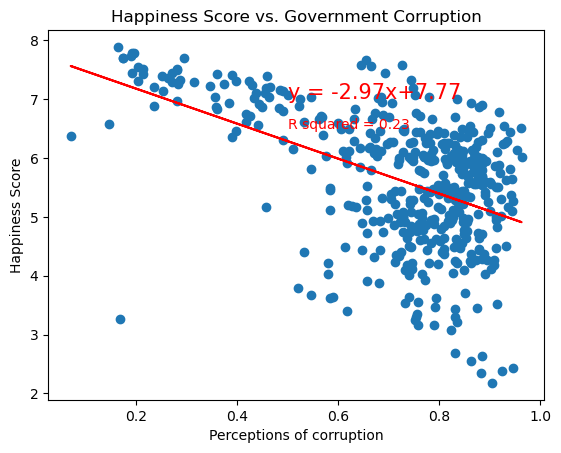

In [29]:
# Create a scatter plot of government corruption vs. Life Ladder
plt.scatter(sorted_df['Perceptions of corruption'], sorted_df['Life Ladder'])

# Add axis labels and a title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Government Corruption')

# Perform linear regression
(corr_slope, corr_intercept, corr_rvalue, corr_pvalue, corr_std_err) = st.linregress(sorted_df['Perceptions of corruption'], sorted_df['Life Ladder'])
regress_values = sorted_df['Perceptions of corruption'] * corr_slope + corr_intercept
line_eq = "y = " + str(round(corr_slope,2)) + "x+" + str(round(corr_intercept,2))

# Find r^2
corr_r_sq = corr_rvalue**2
corr_r_annotate = "R squared = " + str(round(corr_r_sq,2))

# Plot regression line
plt.plot(sorted_df['Perceptions of corruption'], regress_values, "r-")
plt.annotate(line_eq, (0.5, 7), fontsize=15, color="red")
plt.annotate(corr_r_annotate, (0.5, 6.5), fontsize=10, color="red")

# Show the plot
plt.show()


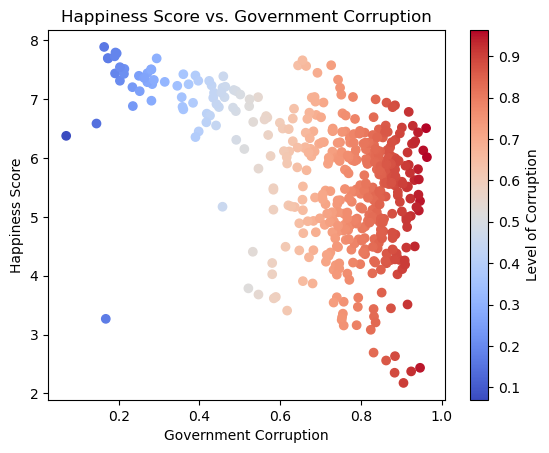

In [33]:
# Create a scatter plot of Life Ladder vs. Government Corruption, with colors representing the level of corruption
plt.scatter(sorted_df['Perceptions of corruption'], sorted_df['Life Ladder'], c=sorted_df['Perceptions of corruption'], cmap='coolwarm')

# Add axis labels and a title
plt.xlabel('Government Corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Government Corruption')

# Add a colorbar to show the level of corruption
cbar = plt.colorbar()
cbar.set_label('Level of Corruption')

# Show the plot
plt.show()


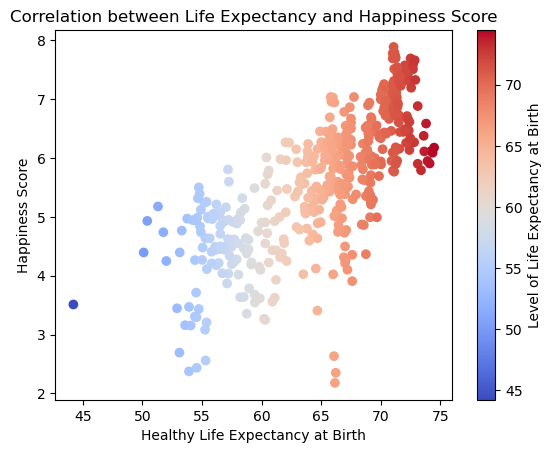

In [46]:
# create a scatter plot of life expectancy vs happiness score
plt.scatter(sorted_df['Healthy life expectancy at birth'], sorted_df['Life Ladder'], c=sorted_df['Healthy life expectancy at birth'], cmap='coolwarm')


# add axis labels and a title
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Happiness Score')
plt.title('Correlation between Life Expectancy and Happiness Score')

# Add a colorbar to show the level of Life Expectancy at Birth
cbar = plt.colorbar()
cbar.set_label('Level of Life Expectancy at Birth')

# display the plot
plt.show()


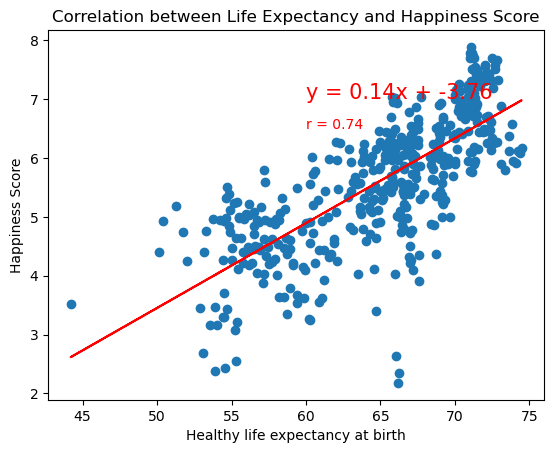

In [54]:
import matplotlib.pyplot as plt
import scipy.stats as st

# create a scatter plot of life expectancy vs happiness score
plt.scatter(sorted_df['Healthy life expectancy at birth'], sorted_df['Life Ladder'])

# add axis labels and a title
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Happiness Score')
plt.title('Correlation between Life Expectancy and Happiness Score')

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sorted_df['Healthy life expectancy at birth'], sorted_df['Life Ladder'])
regress_values = sorted_df['Healthy life expectancy at birth'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# add regression line to plot
plt.plot(sorted_df['Healthy life expectancy at birth'], regress_values, "r-")
plt.annotate(line_eq, (60, 7), fontsize=15, color="red")

# add r-value to plot
r_value = "r = " + str(round(rvalue, 2))
plt.annotate(r_value, (60, 6.5), fontsize=10, color="red")

# display the plot
plt.show()
